<center>
    <h1> Math761: HW 2 <br>
    Basic Simulation Practice </h1>
  </center>
  
  ## Sequoia Andrade
### 9/12/2023


In [1]:
set.seed(1)   # for reproducibility

### Exercise 1

We saw a problem where 5 students sat in a room that was scaled to the unit square. Now consider a situation where 10 students are sitting in a rectangular room, but their positions can only take on discrete values because they sit in chairs which are arranged in rows and columns. The seats are in rows 1, 2, ..., 6 and columns 1, 2, ..., 5.  The students are sitting in the seats located at the following pairs of (row, column):

(1, 3); (1, 4); (1; 5);

(2, 3); 

(4, 2); (4, 4); (4, 5);

(5, 1); (5, 2);

(6, 3)

#### a) Using simulation, please plot a histogram of your simulated distance values and draw a vertical line through it that represents the statistic for the actual data. Also report the approximate p-value that we would see data as extreme as this data (one sided test) if the students really were sitting randomly, independently discretely uniformly around the classroom. Make sure you justify which direction you test in as part of your work.

*Answer:*

 In this case, the sample statistic gives a value of 268.16, while the mean of the randomly sampled data gives a value of 254.29. Hence, we test for extremety by looking for samples that are greater than our sample statistic of 268.16. In this case, we would be testing the hypothesis that students sit at a greater distance from one another than random. 

$H_0:$ students are sitting randomly $\mu=\mu_0$

$H_1:$ students are sitting further apart than random $\mu>\mu_0$ 
 
 The approximate p-value is 0.317 from the simulation when using a one-sided test. Thus the probability of seeing data as extreme as ours given the students really sit randomly is 0.317. 

*Redo*: Edited the justification, hypothesis test setup, and p-value


In [2]:
# a) 
# define x and y coordinate vectors
xCoord = c(1, 1, 1, 2, 4, 4, 4, 5, 5, 6)
yCoord = c(3, 4, 5, 3, 2, 4, 5, 1, 2, 3)

#define point distance function
pointDistances = function(xVec, yVec){
    total = 0
    n = length(xVec)
    for (i in 1:n){
        for (j in 1:n){
            dist_ij = sqrt((xVec[i] - xVec[j])^2 + (yVec[i] - yVec[j])^2)
            total = total +dist_ij
        }
    }
    return(total)
}

test_statistic = pointDistances(xCoord, yCoord)
test_statistic

[1] 268.1575

In [3]:
# select random students

numStudents = 10
runs = 1000
x = 1:6
y = 1:5
s = rep(NA, runs)
for (r in 1:runs){
    studentsX = sample(x, numStudents, replace=TRUE) # sample student x positions
    studentsY = sample(y, numStudents, replace=TRUE) # sample student y positions
    s[r] = pointDistances(studentsX, studentsY) # sample statistic
}
mean(s)


[1] 254.2868

In [4]:
mean(s>test_statistic)

[1] 0.317

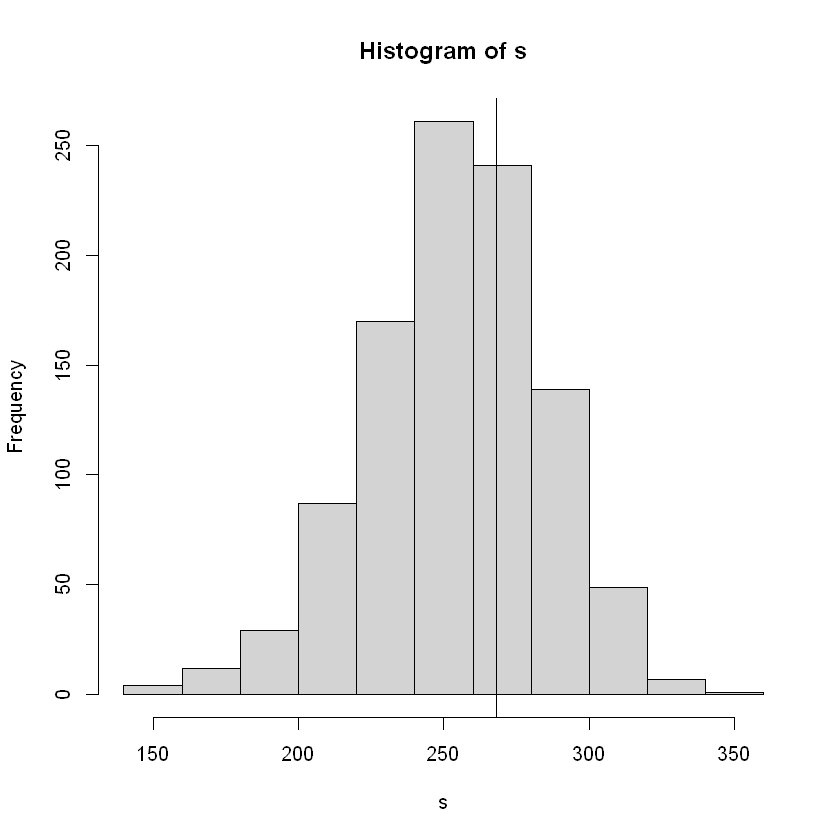

In [5]:
hist(s)
abline(v=test_statistic)


#### b) Then answer: what is your conclusion about how students sat in class? Use hypothesis testing at the $\alpha=.05$ level.

*Answer:*

$H_0:$ students are sitting randomly $\mu=\mu_0$

$H_1:$ students are sitting further apart than random $\mu>\mu_0$ *Updated for redo*

The resulting p-value is about 0.317, thus at the  $\alpha=.05$ we fail to reject the null hypothesis and do not have evidence that students sit farther apart than they would by random. *Updated for redo*

In [6]:
mean(s>test_statistic)

[1] 0.317

### Exercise 2: Performance of $k$ trimmed means

Estimate the MSE and variances of the level $k$ trimmed means for 1000 random samples of size 20 generated from a standard Cauchy distribution with center at 0. Summarize the estimates of MSE and variances in a table for $k = 1, 2, ..., 9.$ Then answer, what does the simulation tell you about how the different k-level trimmed means perform for this setting? As part of your answer, answer what levels of $k$ seem to do best.

*Answer:*

The different k-level trimmed means perform better as k increases generally, with all means showing very low bias. The mean with the worst performance is k=1, while the mean with k=8 is best with a MSE of 0.1372752 and variance of 0.1371415. At the k=9 mean, performance appears to decrease slightly.
    

In [7]:
kTrimmedMean = function(x,k){
    return(mean(sort(x)[(k+1): (length(x)-k)]))
}

In [8]:
# set up
n = 20
runs = 1000 
theta = 0
set.seed(3)
# data storage
results = data.frame("MSE"=rep(NA,9), "Var"=rep(NA,9),
        row.names=c("1-trimmed mean", "2-trimmed mean", "3-trimmed mean", "4-trimmed mean", "5-trimmed mean", "6-trimmed mean", "7-trimmed mean", "8-trimmed mean", "9-trimmed mean"))
ks = 1:9
theta_hat_1s = rep(NA, runs)
for (k in ks){
    for (r in 1:runs){
        sample = rcauchy(n, location = 0, scale = 1)
        # estimators
        theta_hat1 = kTrimmedMean(sample,k)
        theta_hat_1s[r] = theta_hat1
    }
    #store mse
    results[k, 1] = mean((theta_hat_1s-theta)^2)
    #store var
    results[k, 2] = var(theta_hat_1s)
}



results

,MSE,Var
,<dbl>,<dbl>
1-trimmed mean,1.2434148,1.2446140
2-trimmed mean,0.4118633,0.4122692
3-trimmed mean,0.2322813,0.2324029
4-trimmed mean,0.1838342,0.1838302
5-trimmed mean,0.1617130,0.1612652
6-trimmed mean,0.1541962,0.1543269
7-trimmed mean,0.1475527,0.1474962
8-trimmed mean,0.1372752,0.1371415
9-trimmed mean,0.1473505,0.1472886


### Exercise 3: Studying outside the scope of the CLT

Recall that we simulated the CLT (Central Limit Theorem) phenomenon in class by creating 1000 averages, each average from a random sample of 100 random variables drawn from various distributions (normal, uniform, binomial, negative binomial, and Poisson).

a. Now create a similar simulation by modifying what we did in class, but explore the results of drawing only a sample size of 5 points from an exponential distribution with rate .2.  Draw a histogram of 1000 averages, and over it, draw the theoretical curve that the CLT says the average should follow for large samples. Then answer, do the 1000 averages still seem to obey the CLT?

*Answer:*
First we need to calculate the theoretical mean and standard error.

$\mu = 1/\lambda = 1/0.2= 5$

$\sigma^2 = (1/\lambda)^2 = 5^2 = 25$

$\sigma = 5$

Standard error:

$\sigma^2 = \frac{25}{5} =5 $

The samples appear skewed right slightly and do not exactly follow the CLT for this small sample size, though it is close. The sample peak is slightly to the left of the peak given by the CLT.

*Redo:*

Updated a) to use the theoretical mean and standrad deviation instead of the sample values. Also updated the theoretical standard deviation to be correct.


In [18]:
theoretical_mean = 1/0.2
theoretical_sd = sqrt(5) 

[1] "Mean"
[1] 4.848735
[1] "Standard Deviation"
[1] 2.27751
[1] "Variance"
[1] 5.187054


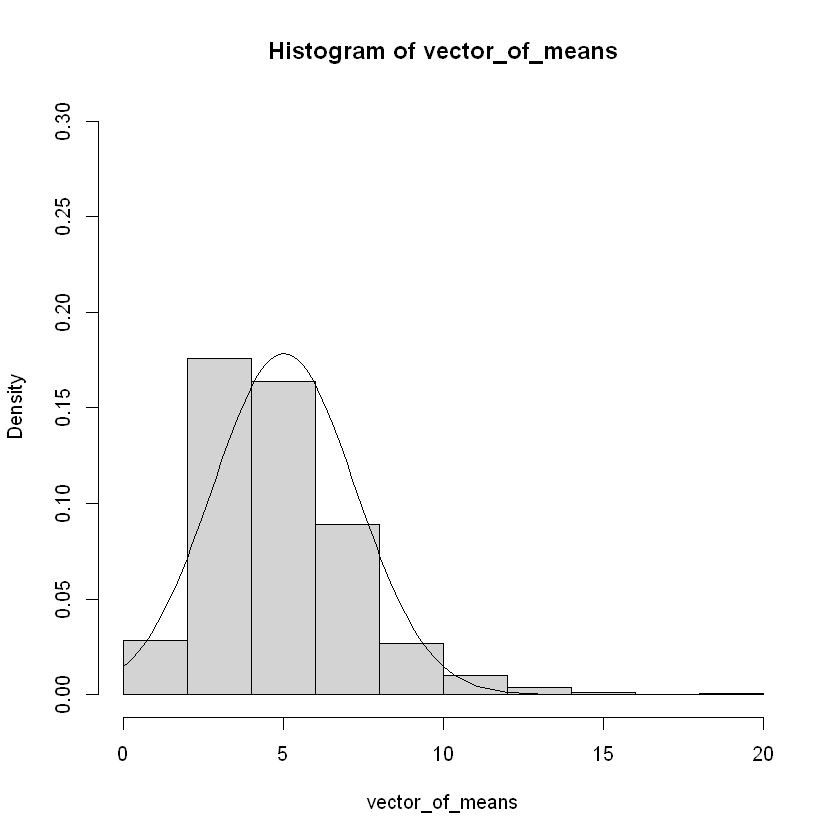

In [19]:
# a
n = 5
n_samples = 1000

vector_of_means = rep(NA, n_samples)

for (i in 1:n_samples){
    obs = rexp(n, 0.2)
    vector_of_means[i] = mean(obs)
}

print("Mean")

sample_mean = mean(vector_of_means)
print(sample_mean)

print("Standard Deviation")
sample_sd = sd(vector_of_means, na.rm=FALSE)
print(sample_sd)

print("Variance")
print(var(vector_of_means))


hist(vector_of_means, prob=TRUE, ylim=c(0, 0.3))
x = seq( from=0, to=15, length =100)
lines(x, dnorm(x, mean=theoretical_mean, sd = theoretical_sd))

b. The CLT also doesn't say anything about the median but we can use simulations to explore its properties. Again modify what we did in class but explore the results of drawing a sample size of 100 points from an exponential distribution with rate .2. This time look at the histogram of 1000 medians rather than 1000 means. Again, plot the CLT theorem curve (as it applies to the mean) over it. What do your results seem to suggest about the distributional properties for the median with respect to the CLT?

*Answer:*

The distribution of the sample medians appear to follow the shape given by the CLT; however, the distribution is offset when the curve is plotted with respect to the mean. When the CLT theorem curve is plotted with respect to the mean of the medians, then the distribution fits the CLT well. The median itself follows the CLT when the median is considered as the sample mean, but the sampling distribution of the medians does not follow the CLT curve of the sampling distribution of the mean.

[1] "Mean"
[1] 3.476645
[1] "Standard Deviation"
[1] 0.5108438
[1] "Variance"
[1] 0.2609614


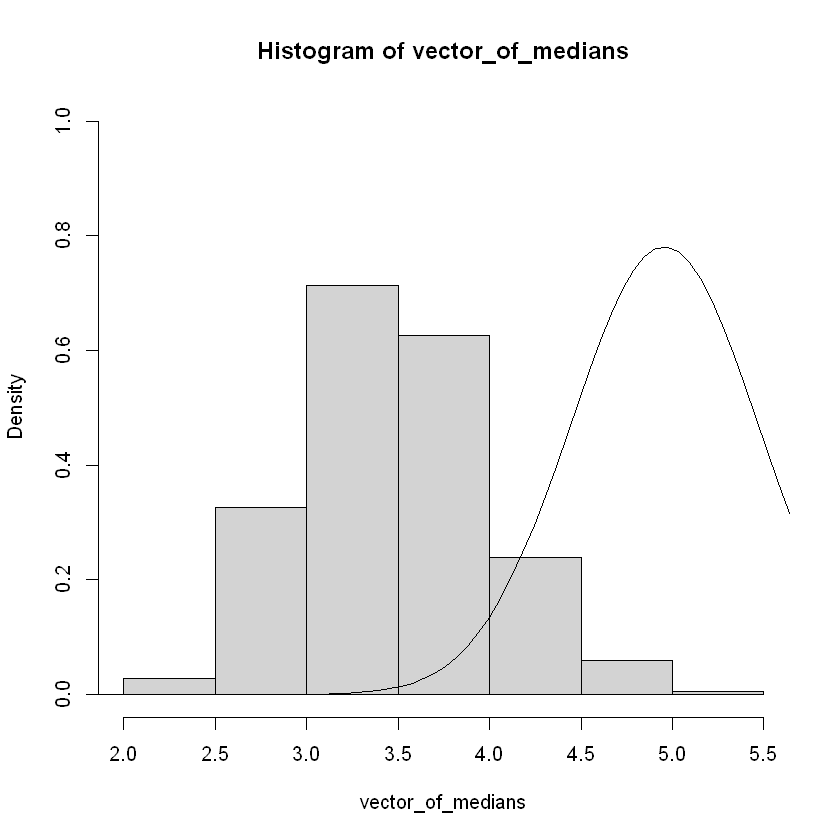

In [11]:
# b
n = 100
n_samples = 1000

vector_of_medians = rep(NA, n_samples)

for (i in 1:n_samples){
    obs = rexp(n, 0.2)
    vector_of_medians[i] = median(obs)
}

print("Mean")

sample_mean = mean(vector_of_medians)
print(sample_mean)

print("Standard Deviation")
sample_sd = sd(vector_of_medians, na.rm=FALSE)
print(sample_sd)

print("Variance")
print(var(vector_of_medians))


hist(vector_of_medians, prob=TRUE, ylim=c(0, 1), breaks=10)
x = seq( from=0, to=6, length =100)
lines(x, dnorm(x, mean=mean(vector_of_means), sd = sample_sd))

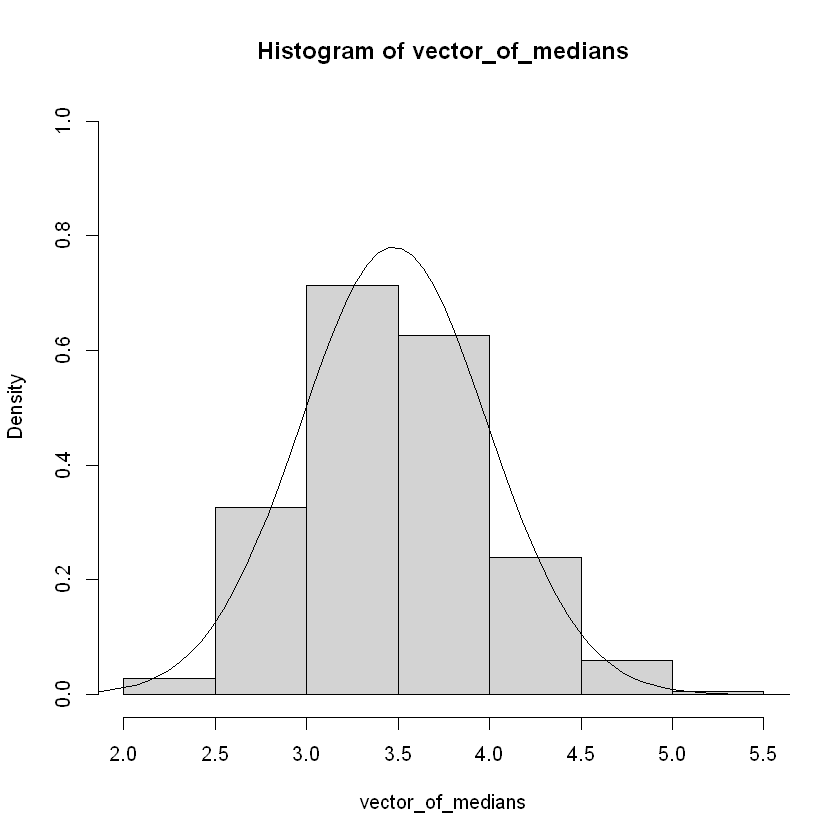

In [15]:
hist(vector_of_medians, prob=TRUE, ylim=c(0, 1), breaks=10)
x = seq( from=0, to=6, length =100)
lines(x, dnorm(x, mean=mean(vector_of_medians), sd = sample_sd))

### Exercise 4: Performance of the Gini Index

Let $X$ be a non-negative random variance with $\mu=\mathbb{E}X <\infty$. For a random sample $x_1, \ldots, x_n$ from the distribution of $X$, the Gini ratio is defined by

$$
G = \frac{1}{2n^2\mu}\sum_{j=1}^{n}\sum_{i=1}^{n}|x_i-x_j|.
$$

The Gini ratio is a measure of income equality (used in Economics). Note that G can be written in terms of the order statistics $x_{(i)}$ as

$$
G = \frac{1}{n^2\mu}\sum_{i=1}^{n}\left(2i-n-1\right)x_{(i)}.
$$

If the mean is unknown, let $\hat{G}$ be the statistic $G$ with $\mu$ replaced by $\bar{x}$. Estimate using 1000 samples (each sample size 100) the mean and standard error of $\hat{G}$ if $X$ is


In [12]:
gini = function(x){ # definition of gini using the order statistics
    x = sort(x) # get x in order
    n = length(x)
    sum = 0
    for (i in 1:n){
        sum = sum + ((2*i - n-1)*x[i]) # calculate summation
    }
    G = sum/(n*n*mean(x)) # calculate G hate
    return (G)
}

(a) Uniform(0, 1);

*Answer:*

In [13]:
# a
n_samples = 1000
sample_size = 100
g_vals = rep(NA, n_samples)
for (i in 1:n_samples){
    x = runif(sample_size)
    g_vals[i] = gini(x)
}

print("mean")

print(mean(g_vals))

print("standard error")

print(sd(g_vals)/sqrt(sample_size))

[1] "mean"
[1] 0.3320886
[1] "standard error"
[1] 0.002389156


(b) Bernoulli(0.1).

*Answer:*

In [14]:
# b
n_samples = 1000
sample_size = 100
g_vals = rep(NA, n_samples)
for (i in 1:n_samples){
    x = rbinom(sample_size, 1, 0.1)
    g_vals[i] = gini(x)
}

print("mean")

print(mean(g_vals))

print("standard error")

print(sd(g_vals)/sqrt(sample_size))

[1] "mean"
[1] 0.90085
[1] "standard error"
[1] 0.002999462
